In [1]:
import pandas as pd
import seaborn as sns
from FRA import *
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

**Correr esta celda para distancia euclidiana**

In [11]:
# List of columns for region visited
Num_Loc = 8
cols1 = ['a' + str(i) + str(j) \
for i in range(1, Num_Loc + 1) \
for j in range(1, Num_Loc + 1) \
]
focals, strategies = create_regions_and_strategies(8)
complements = [[1 - x for x in sublist] for sublist in focals]
columns = ['Dyad', 'Round', 'Player', 'Region', 'Category',\
           'RegionGo', 'Score', 'S_score', 'DLIndex', 'S_dlindex',\
           'Similarity', 'SimilarityGo', 'Dists', 'Dists1', 'indice']

#data = pd.read_csv('../Data/humans_absent.csv')
#data['Region'] = data['Region'].apply(lambda x: [int(y) for y in x[1:-1].split(',')])
#data['RegionGo'] = data['RegionGo'].apply(lambda x: [int(y) for y in x[1:-1].split(',')])
#data['Overlap'] = data['Overlap'].apply(lambda x: [int(y) for y in x[1:-1].split(' ')])
#data['DistsO'] = data['Overlap'].apply(lambda x: [dist(x, f) for f in focals])
#data['SizeO'] = data['Overlap'].apply(lambda x: np.sum(x))
#data['DistsC'] = data['Overlap'].apply(lambda x: [dist(x, f) for f in complements])
#data['Dists'] = data['Region'].apply(lambda x: [dist(x, f) for f in focals])
#data['Dists1'] = data['RegionGo'].apply(lambda x: [dist(x, f) for f in focals])
#data['Size'] = data['Region'].apply(lambda x: np.sum(x))
#data['S_score'] = data['Score'].apply(lambda x: sigmoid(x, 10, 30))
#data['indice'] = data.index
#data['Dif'] = data.apply(lambda x: np.subtract(x['Dists'], x['Dists1']).tolist(), axis=1)

data = pd.read_csv('../Data/new_humans_only_absent.csv')
data['Region'] = data.apply(lambda x: x[cols1].to_list(), axis=1)
data['RegionGo'] = data.groupby(['Dyad', 'Player'])['Region'].transform('shift', -1)
data['CategoryGo'] = data.groupby(['Dyad', 'Player'])['Category'].transform('shift', -1)
data['SimilarityGo'] = data.groupby(['Dyad', 'Player'])['Similarity'].transform('shift', -1)
data['Dists'] = data['Region'].apply(lambda x: [dist(x, f) for f in focals])
data['Dists1'] = data['RegionGo'].apply(lambda x: [dist(x, f) for f in focals])
data['Size'] = data['Region'].apply(lambda x: np.sum(x))
data['S_score'] = data['Score'].apply(lambda x: sigmoid(x, 10, 30))
data['S_dlindex'] = data['DLIndex'].apply(lambda x: sigmoid(x, 50, .8))
data['indice'] = data.index
data = data[columns]
data.head(2)

,Dyad,Round,Player,Region,Category,RegionGo,Score,S_score,DLIndex,S_dlindex,Similarity,SimilarityGo,Dists,Dists1,indice
0,140-615,1,140-615PL1,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",RS,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",23.0,3.975450e-31,0.609375,0.000073,12,15.0,"[20, 44, 12, 52, 36, 28, 28, 36]","[49, 15, 19, 45, 33, 31, 37, 27]",0
1,140-615,9,140-615PL1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RS,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27.0,9.357623e-14,0.828125,0.803174,15,0.0,"[49, 15, 19, 45, 33, 31, 37, 27]","[64, 0, 32, 32, 32, 32, 36, 28]",1


**Creando variables con sigmoides**

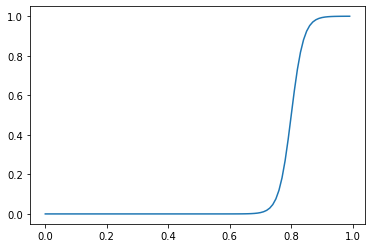

In [8]:
x = [0.01*i for i in range(0, 100)]
y = [sigmoid(i, 50, .8) for i in x]
sns.lineplot(x=x, y=y)

In [7]:
data['S_score'] = data['Score'].apply(lambda x: sigmoid(x, 10, 30))

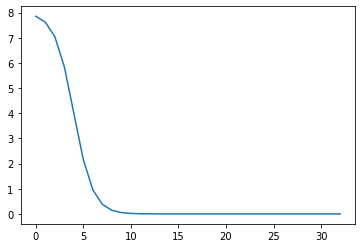

In [31]:
x = range(0, 33)
y = [8 - 8*sigmoid(i, 1, 4) for i in x]
sns.lineplot(x=x, y=y)

**Variables como series**

In [24]:
sims = []
sims1 = []
simso = []
simsc = []
s_simsc = []
difs = []
scores = []
size = []
sizeo = []
s_scores = []
reg_focal = []

regiones = [0, 1, 2, 3, 4, 5, 6, 7]
for i in regiones:
    aux = data['Dists'].apply(lambda x: x[i]).to_list()
    sims += aux
    aux = data['Dists1'].apply(lambda x: x[i]).to_list()
    sims1 += aux
    aux = data['DistsO'].apply(lambda x: x[i]).to_list()
    simso += aux
    aux = data['DistsC'].apply(lambda x: x[i]).to_list()
    simsc += aux
    aux = data['DistsC'].apply(lambda x: 8 - 8*sigmoid(x[i], 1, 4)).to_list()
    s_simsc += aux
    aux = data['Dif'].apply(lambda x: x[i]).to_list()
    difs += aux
    aux = data['Score'].to_list()
    scores += aux
    aux = data['S_score'].to_list()
    s_scores += aux
    aux = data['Size'].to_list()
    size += aux
    aux = data['SizeO'].to_list()
    sizeo += aux
    reg_focal += [nameRegion(i)]*data.shape[0]


print(len(sims))
print(len(sims1))
print(len(simso))
print(len(simsc))
print(len(s_simsc))
print(len(difs))
print(len(scores))
print(len(s_scores))
print(len(size))
print(len(sizeo))
print(len(reg_focal))

9952
9952
9952
9952
9952
9952
9952
9952
9952
9952
9952


In [25]:
df = pd.DataFrame({
    'Dists1': sims1, 
    'Dists':sims, 
    'DistsO':simso, 
    'DistsC':simsc, 
    'S_DistsC':s_simsc, 
    'Score':scores, 
    'S_score':s_scores, 
    'Size':size, 
    'Sizeo':sizeo,
    'Difs':difs
})
df.head()

,Dists1,Dists,DistsO,DistsC,S_DistsC,Score,S_score,Size,Sizeo,Difs
0,21,20,55,9,0.053543,23,3.975450e-31,44,9,-1
1,53,51,55,9,0.053543,23,3.975450e-31,13,9,-2
2,64,49,59,5,2.151531,27,9.357623e-14,15,5,-15
3,37,16,59,5,2.151531,27,9.357623e-14,48,5,-21
4,64,64,64,0,7.856110,32,1.000000e+00,0,0,0


In [26]:
df['Direction'] = df['Difs'].apply(lambda x: 1 if x>=0 else -1)
df.head()

,Dists1,Dists,DistsO,DistsC,S_DistsC,Score,S_score,Size,Sizeo,Difs,Direction
0,21,20,55,9,0.053543,23,3.975450e-31,44,9,-1,-1
1,53,51,55,9,0.053543,23,3.975450e-31,13,9,-2,-1
2,64,49,59,5,2.151531,27,9.357623e-14,15,5,-15,-1
3,37,16,59,5,2.151531,27,9.357623e-14,48,5,-21,-1
4,64,64,64,0,7.856110,32,1.000000e+00,0,0,0,1


**Análisis univariado**

Text(0.5, 1.0, 'Sigmoid Score')

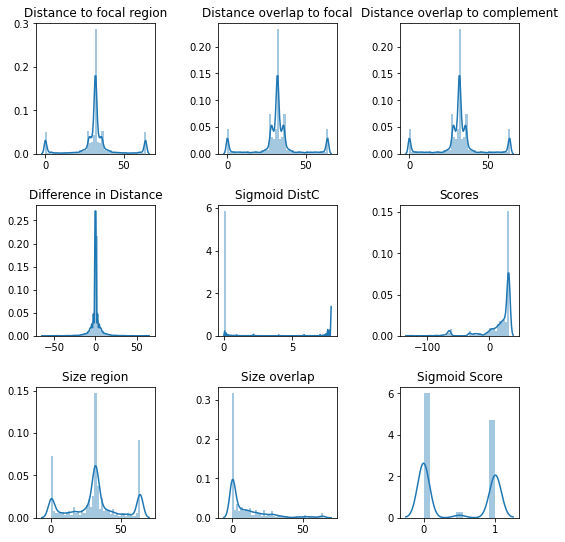

In [27]:
fig, ax = plt.subplots(3,3, figsize=(8,8))
fig.tight_layout(pad=3.0)

sns.distplot(sims, ax=ax[0,0])
ax[0,0].set_title('Distance to focal region')
sns.distplot(simso, ax=ax[0,1])
ax[0,1].set_title('Distance overlap to focal')
sns.distplot(simsc, ax=ax[0,2])
ax[0,2].set_title('Distance overlap to complement')

sns.distplot(difs, ax=ax[1,0])
ax[1,0].set_title('Difference in Distance')
sns.distplot(s_simsc, ax=ax[1,1])
ax[1,1].set_title('Sigmoid DistC')
sns.distplot(scores, ax=ax[1,2])
ax[1,2].set_title('Scores')

sns.distplot(size, ax=ax[2,0])
ax[2,0].set_title('Size region')
sns.distplot(sizeo, ax=ax[2,1])
ax[2,1].set_title('Size overlap')
sns.distplot(s_scores, ax=ax[2,2])
ax[2,2].set_title('Sigmoid Score')


**Analisis bivariado**

Text(0.5, 1.0, 'simsc vs sims1')

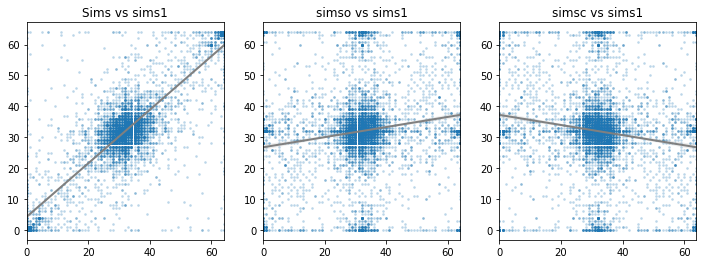

In [32]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
sns.regplot(x=sims, y=sims1, ax=ax[0], scatter_kws={'s': 3, 'alpha': 0.2}, 
           line_kws={'lw': 2, 'color': 'gray'})
ax[0].set_title('Sims vs sims1')
sns.regplot(x=simso, y=sims1, ax=ax[1], scatter_kws={'s': 3, 'alpha': 0.2}, 
           line_kws={'lw': 2, 'color': 'gray'})
ax[1].set_title('simso vs sims1')
sns.regplot(x=simsc, y=sims1, ax=ax[2], scatter_kws={'s': 3, 'alpha': 0.2}, 
           line_kws={'lw': 2, 'color': 'gray'})
ax[2].set_title('simsc vs sims1')

Text(0.5, 1.0, 'simsc vs difs')

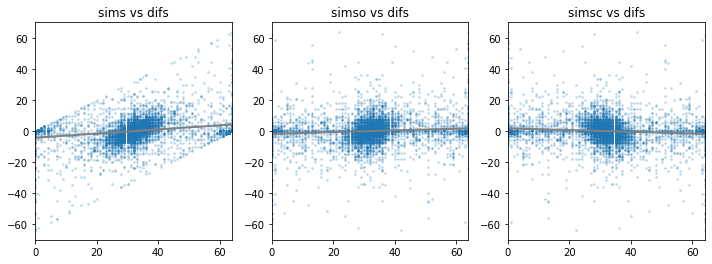

In [33]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
sns.regplot(x=sims, y=difs, ax=ax[0], scatter_kws={'s': 3, 'alpha': 0.2}, 
           line_kws={'lw': 2, 'color': 'gray'})
ax[0].set_title('sims vs difs')
sns.regplot(x=simso, y=difs, ax=ax[1], scatter_kws={'s': 3, 'alpha': 0.2}, 
           line_kws={'lw': 2, 'color': 'gray'})
ax[1].set_title('simso vs difs')
sns.regplot(x=simsc, y=difs, ax=ax[2], scatter_kws={'s': 3, 'alpha': 0.2}, 
           line_kws={'lw': 2, 'color': 'gray'})
ax[2].set_title('simsc vs difs')

Text(0.5, 1.0, 'size overlap score vs sims1')

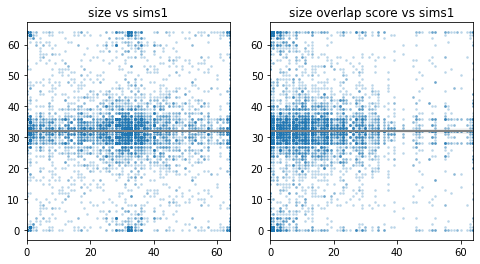

In [367]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.regplot(x=size, y=sims1, ax=ax[0], scatter_kws={'s': 3, 'alpha': 0.2}, 
           line_kws={'lw': 2, 'color': 'gray'})
ax[0].set_title('size vs sims1')
sns.regplot(x=sizeo, y=sims1, ax=ax[1], scatter_kws={'s': 3, 'alpha': 0.2}, 
           line_kws={'lw': 2, 'color': 'gray'})
ax[1].set_title('size overlap score vs sims1')

In [148]:
columnas = ['Sims', 'Simso', 'Simsc', 'S_score']
df[columnas].corr()

,Sims,Simso,Simsc,S_score
Sims,1.000000e+00,2.205730e-01,-2.205730e-01,-1.037591e-16
Simso,2.205730e-01,1.000000e+00,-1.000000e+00,2.503355e-16
Simsc,-2.205730e-01,-1.000000e+00,1.000000e+00,-2.503355e-16
S_score,-1.037591e-16,2.503355e-16,-2.503355e-16,1.000000e+00


**Regresiones lineales**

Similarity(n+1) ~ Similarity(n)

In [149]:
x = np.array(sims).reshape(-1, 1)
x = sm.add_constant(x)
y = sims1
x, y = np.array(x), np.array(y)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 2.932e+04
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:27:30   Log-Likelihood:                -33245.
No. Observations:                9952   AIC:                         6.649e+04
Df Residuals:                    9950   BIC:                         6.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2845      0.176     24.376      0.0

Similarity(n+1) ~ Similarity_overlap_complement(n)

In [150]:
x = np.array(simsc).reshape(-1, 1)
model1 = LinearRegression().fit(x, sims1)
r_sq = model1.score(x, sims1)
print('coefficient of determination:', r_sq)
print('intercept:', model1.intercept_)
print('slope:', model1.coef_)

coefficient of determination: 0.02707689049769335
intercept: 37.23806233155966
slope: [-0.16368945]


Similarity(n+1) ~ Similarity_overlap(n)

In [151]:
x = np.array(simso).reshape(-1, 1)
model1 = LinearRegression().fit(x, sims1)
r_sq = model1.score(x, sims1)
print('coefficient of determination:', r_sq)
print('intercept:', model1.intercept_)
print('slope:', model1.coef_)

coefficient of determination: 0.02707689049769335
intercept: 26.761937668440343
slope: [0.16368945]


Similarity(n+1) ~ Score(n)

In [152]:
x = np.array(scores).reshape(-1, 1)
model1 = LinearRegression().fit(x, sims1)
r_sq = model1.score(x, sims1)
print('coefficient of determination:', r_sq)
print('intercept:', model1.intercept_)
print('slope:', model1.coef_)

coefficient of determination: 0.0
intercept: 32.0
slope: [7.46906891e-18]


Similarity(n+1) ~ Similarity(n) + Score(n)

In [153]:
x = np.column_stack((sims, scores))
model1 = LinearRegression().fit(x, sims1)
r_sq = model1.score(x, sims1)
print('coefficient of determination:', r_sq)
print('intercept:', model1.intercept_)
print('slope:', model1.coef_)

coefficient of determination: 0.7465944867656402
intercept: 4.284535268708488
slope: [0.86610827 0.        ]


Similarity(n+1) ~ Similarity(n) + S_score(n)

In [154]:
x = np.column_stack((sims, s_scores))
model1 = LinearRegression().fit(x, sims1)
r_sq = model1.score(x, sims1)
print('coefficient of determination:', r_sq)
print('intercept:', model1.intercept_)
print('slope:', model1.coef_)

coefficient of determination: 0.7465944867656402
intercept: 4.284535268708485
slope: [8.66108273e-01 2.57326211e-15]


Similarity(n+1) ~ Similarity(n) + simso(n)

In [155]:
x = np.column_stack((sims, simso))
model1 = LinearRegression().fit(x, sims1)
r_sq = model1.score(x, sims1)
print('coefficient of determination:', r_sq)
print('intercept:', model1.intercept_)
print('slope:', model1.coef_)

coefficient of determination: 0.747307084229741
intercept: 4.962111837550086
slope: [ 0.87215938 -0.02722537]


Similarity(n+1) ~ Similarity(n) + S_score(n) + S_simsc(n)

In [156]:
x = np.column_stack((sims, s_scores, s_simsc))
model1 = LinearRegression().fit(x, sims1)
r_sq = model1.score(x, sims1)
print('coefficient of determination:', r_sq)
print('intercept:', model1.intercept_)
print('slope:', model1.coef_)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 9952 and the array at index 2 has size 0

### Two-way interactions

Similarity(n+1) ~ Similarity(n) * S_score(n)

In [157]:
mod = smf.ols(formula='Sims1 ~ Sims*S_score + Simso', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sims1   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     8065.
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:27:33   Log-Likelihood:                -32884.
No. Observations:                9952   AIC:                         6.578e+04
Df Residuals:                    9947   BIC:                         6.581e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.0750      0.290     34.685   

In [158]:
mod = smf.ols(formula='Sims1 ~ Sims * S_simsc', data=df)
res = mod.fit()
print(res.summary())

PatsyError: Error evaluating factor: NameError: name 'S_simsc' is not defined
    Sims1 ~ Sims * S_simsc
                   ^^^^^^^

In [159]:
mod = smf.ols(formula='Sims1 ~ Sims * S_score + Simso', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sims1   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     8065.
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:27:34   Log-Likelihood:                -32884.
No. Observations:                9952   AIC:                         6.578e+04
Df Residuals:                    9947   BIC:                         6.581e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.0750      0.290     34.685   

In [372]:
mod = smf.ols(formula='difs ~ Sims + Simso + Simsc', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   difs   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     365.3
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          8.31e-154
Time:                        07:12:47   Log-Likelihood:                -33231.
No. Observations:                9952   AIC:                         6.647e+04
Df Residuals:                    9949   BIC:                         6.649e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020   8.75e-05     22.817      0.0

## Analisis por región

In [160]:
def analisis_region(r):
    
    i = numberRegion(r)
    sims = data['Sims'].apply(lambda x: x[i]).to_list()
    sims1 = data['Sims1'].apply(lambda x: x[i]).to_list()
    simso = data['SimsO'].apply(lambda x: x[i]).to_list()
    simsc = data['SimsC'].apply(lambda x: x[i]).to_list()
    difs = data['Dif'].apply(lambda x: x[i]).to_list()
    scores = data['Score'].to_list()
    s_scores = data['S_score'].to_list()
    size = data['Size'].to_list()
    sizeo = data['SizeO'].to_list()
    
    fig, ax = plt.subplots(2,3, figsize=(9,6))
    fig.tight_layout(pad=3.0)

    sns.distplot(sims, ax=ax[0,0])
    ax[0,0].set_title('Similarity to focal region')
    sns.distplot(simso, ax=ax[0,1])
    ax[0,1].set_title('Similarity overlap to focal')
    sns.distplot(simsc, ax=ax[0,2])
    ax[0,2].set_title('Similarity overlap to complement')

    sns.distplot(difs, ax=ax[1,0])
    ax[1,0].set_title('Difference in similarity')
    sns.distplot(np.log(np.add(difs, 0.00001)), ax=ax[1,1])
    ax[1,1].set_title('Log Difference in similarity')
    sns.distplot(scores, ax=ax[1,2])
    ax[1,2].set_title('Scores')
    
    df = pd.DataFrame({
        'Sims1': sims1, 
        'Sims':sims, 
        'Simso':simso, 
        'Simsc':simsc, 
        'Score':scores, 
        'S_score':s_scores, 
        'Size':size, 
        'Sizeo':sizeo})
    print(df.head())
    columnas = ['Sims', 'Simso', 'Simsc', 'S_score']
    df[columnas].corr()
    
    mod = smf.ols(formula='Sims1 ~ Sims * S_score + Simso', data=df)
    res = mod.fit()
    print(res.summary())
    return res.params

   Sims1  Sims  Simso  Simsc  Score   S_score  Size  Sizeo
0     27    28     37     27     23  0.047426    44      9
1     37    41     37     27     23  0.047426    13      9
2     32    31     31     33     27  0.731059    15      5
3     35    30     31     33     27  0.731059    48      5
4     32    32     32     32     32  0.997527     0      0
                            OLS Regression Results                            
Dep. Variable:                  Sims1   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     2686.
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:46:05   Log-Likelihood:                -3567.1
No. Observations:                1244   AIC:                             7144.
Df Residuals:                    1239   BIC:                             7170.
Df Model:     

Intercept       17.946528
Sims             0.728424
S_score         -9.146531
Sims:S_score     0.273292
Simso           -0.280823
dtype: float64

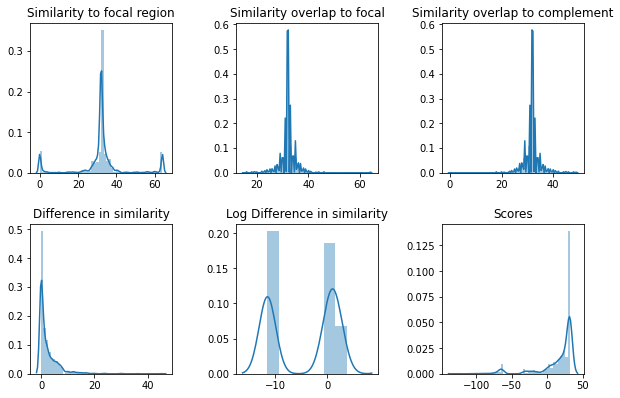

In [227]:
analisis_region('LEFT')

In [228]:
def parameters_region(i, data):
    
#    i = numberRegion(r)
    sims = data['Sims'].apply(lambda x: x[i]).to_list()
    sims1 = data['Sims1'].apply(lambda x: x[i]).to_list()
    simso = data['SimsO'].apply(lambda x: x[i]).to_list()
    simsc = data['SimsC'].apply(lambda x: x[i]).to_list()
    difs = data['Dif'].apply(lambda x: x[i]).to_list()
    scores = data['Score'].to_list()
    s_scores = data['S_score'].to_list()
    size = data['Size'].to_list()
    sizeo = data['SizeO'].to_list()
        
    df = pd.DataFrame({
        'Sims1': sims1, 
        'Sims':sims, 
        'Simso':simso, 
        'Simsc':simsc, 
        'Score':scores, 
        'S_score':s_scores, 
        'Size':size, 
        'Sizeo':sizeo})

    columnas = ['Sims', 'Simso', 'Simsc', 'S_score']    
    mod = smf.ols(formula='Sims1 ~ Sims * S_score + Simso', data=df)
    res = mod.fit()
    return [round(x, 3) for x in res.params]

In [239]:
print(parameters_region(2, data))

[19.39, 0.536, -13.793, 0.448, -0.161]


In [240]:
def get_pars(data):
    pars = []
    for i in range(8):
        pars.append(parameters_region(i, data))
    return pars

In [241]:
def get_sim_region(sim, s_score, simo, par):
#    simil = par[0]
#    print(simil)
#    simil += par[1]*sim
#    print(simil)
#    simil += par[2]*s_score
#    print(simil)
#    simil += par[3]*sim*s_score
#    print(simil)
#    simil += par[4]*simo
#    print(simil)
    simil = par[0] + par[1]*sim + par[2]*s_score + par[3]*sim*s_score + par[4]*simo
    return simil
#    return par[0] + par[1]*sim + par[2]*s_score + par[3]*sim*score + par[4]*simo
#    return par[1]*sim + par[2]*s_score + par[3]*sim*score + par[4]*simo

In [245]:
def estimate_sims(region, score, overlap, pars, focals):
    sims = [dist(region, f) for f in focals]
    s_score = sigmoid(score, 10, 30)
    simso = [dist(overlap, f) for f in focals]
    return [round(get_sim_region(sims[i], s_score, simso[i], pars[i]), 0) for i in range(8)]

In [246]:
pars = get_pars(data)
print(pars)

[[10.11, 0.711, -7.277, 0.224, -0.011], [9.094, 0.711, -7.048, 0.224, -0.011], [19.39, 0.536, -13.793, 0.448, -0.161], [20.617, 0.536, -14.88, 0.448, -0.161], [16.49, 0.784, -6.478, 0.213, -0.307], [16.952, 0.784, -7.159, 0.213, -0.307], [18.615, 0.675, -7.578, 0.26, -0.248], [18.035, 0.675, -9.035, 0.26, -0.248]]


In [349]:
def get_strategy(dists):

    tiles_in_region = [0]*7
    A = int(dists[1])
    tiles_in_region[0] = A
    siguiente = True
    for i in range(2,8):
        if s[i] < sizes_regions[i]:
            complement = i + 1 if siguiente else i - 1
#            print("Region", nameRegion(i+1), "is bigger than", nameRegion(complement+1))
#            print("i:", i, "complement:", complement)
            tiles_out = round(dists[i]/2)
            tiles_in = A - tiles_out
#            print("tiles_out:", tiles_out, "tiles_in:", tiles_in)
            tiles_in_region[i-1] = tiles_in
            tiles_in_region[complement-1] = tiles_out
        siguiente = not siguiente
    
    A = tiles_in_region[0]
    B = tiles_in_region[1]
    T = tiles_in_region[2]
    L = tiles_in_region[3]
    R = tiles_in_region[4]
#    print(a, b, t, l, r)
#    print("A = ", A)
#    print("B = ", B)
#    print("T = ", T)
#    print("L = ", L)
#    print("R = ", R)
#    print("A int B =", B)
#    print("A int T =", T)
#    print("A int L =", L)
#    print("A int R =", int(r * (A + 32) / (1 + r)))
    Ma = min(T, L, 16, (16 + T + L - A))
    Mi = max(0, T - R, L - 16, T - 16)
#    print("Min(T, L, 16, (16 + T + L - A)) =", Ma)
#    print("Max(0, T - R, L - 16, T - 16) =", Mi)
    try:
        x = randint(Mi, Ma)
    except:
        return []
    y = T - x
    u = L - x
    v = A - x - y - u
#    print("x =", x)
#    print("y =", y)
#    print("u =", u)
#    print("v =", v)
    X = list(range(0,4)) + list(range(8,12)) + list(range(16,20)) + list(range(24, 28))
    Y = list(range(4,8)) + list(range(12,16)) + list(range(20,24)) + list(range(28, 32))
    U = list(range(32,36)) + list(range(40,44)) + list(range(48,52)) + list(range(56, 60))
    V = list(range(36,40)) + list(range(44,48)) + list(range(52,56)) + list(range(60, 64))
    X = list(np.random.choice(X, x, replace=False)) if x > 0 else []
    Y = list(np.random.choice(Y, y, replace=False)) if y > 0 else []
    U = list(np.random.choice(U, u, replace=False)) if u > 0 else []
    V = list(np.random.choice(V, v, replace=False)) if v > 0 else []    
    region = X + Y + U + V
#    print(region)
    return region

In [352]:
n = 3
region = data['Region'].iloc[n]
score = data['Score'].iloc[n]
overlap = data['Overlap'].iloc[n]
regionGo = data['RegionGo'].iloc[n]
imprime_region(region)
print([dist(region, f) for f in focals])
print([dist(regionGo, f) for f in focals])
print("Puntaje:", score)
#imprime_region(overlap)
s = estimate_sims(region, score, overlap, pars, focals)
print(s)

[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 0, 1, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[16, 48, 48, 16, 34, 30, 24, 40]
[37, 27, 29, 35, 29, 35, 21, 43]
Puntaje: 27
[21.0, 43.0, 40.0, 24.0, 33.0, 31.0, 27.0, 37.0]


In [353]:
strategy = get_strategy(s)
region1 = code2Vector(strategy, 8)
imprime_region(region1)
print("========================")
imprime_region(regionGo)

[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 0, 0, 1, 0, 0, 0]
[1, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]


In [358]:
x = focals[5]
s1 = [dist(x, f) for f in focals]
strategy = get_strategy(s1)
region1 = code2Vector(strategy, 8)
imprime_region(region1)

[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
